<div dir="rtl">

### ۱-۵-۸ مدولاسیون حامل قطار پالس

دامنه از قطار پالس به عنوان حامل استفاده می‌شود. شکل ۸-۲۳ چگونگی کار را نشان می‌دهد. این نوع مدولاسیون دامنه چیزی جز ارسال قطعه‌های هم‌فاصله‌ای از $x(t)$ نیست. در حالت کلی نباید انتظار داشته باشیم که بتوان سیگنال دلخواهی را از این قطعات بازیابی کرد، ولی مفهوم نمونه‌برداری (فصل ۷) چنین می‌نماید که اگر $x(t)$ محدود باند باشد و فرکانس تکرار پالس به حد کافی بزرگ باشد، شاید بتوان این کار را کرد.

با توجه به شکل ۸-۲۳:

$$
y(t) = x(t) \cdot c(t)
$$

یعنی سیگنال مدوله شده $y(t)$ حاصلضرب $x(t)$ و حامل $c(t)$ است. اگر $X(j\omega)$ و $C(j\omega)$ تبدیل فوریه این سیگنال‌ها باشد، با توجه به خاصیت ضرب می‌توان نوشت:

$$
Y(j\omega) = \frac{1}{2\pi} X(j\omega) * C(j\omega)
$$

</div>

In [33]:
!pip install arabic-reshaper python-bidi

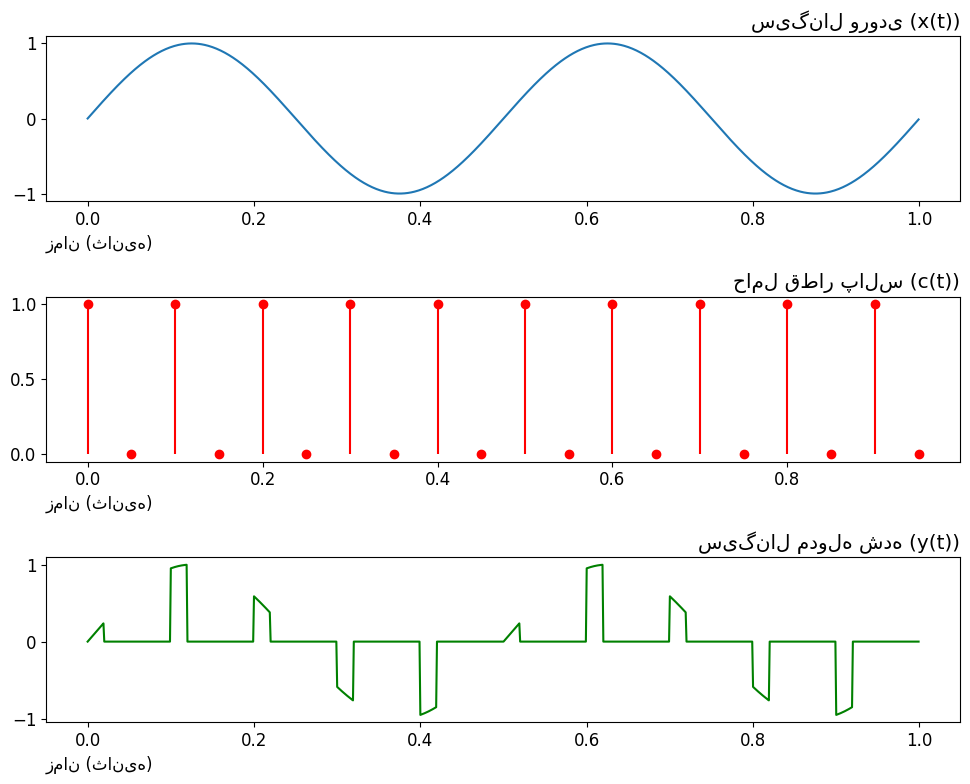

In [34]:
# @title Default title text
from arabic_reshaper import reshape
from bidi.algorithm import get_display

# تبدیل متن فارسی به فرمت راست‌چین
def rtl_text(text):
    return get_display(reshape(text))
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# تنظیم فونت فارسی (نیاز به نصب فونت B Nazanin دارد)
plt.rcParams['font.family'] = 'B Nazanin'

# پارامترهای سیگنال
fs = 1000  # فرکانس نمونه‌برداری
t = np.linspace(0, 1, fs, endpoint=False)  # محور زمان

# سیگنال ورودی x(t) (مثلاً سینوسی با فرکانس 2Hz)
x_t = np.sin(2 * np.pi * 2 * t)

# حامل c(t) (قطار پالس با دوره تناوب 0.1 ثانیه)
pulse_width = 0.02  # عرض هر پالس
c_t = signal.square(2 * np.pi * 10 * t, duty=pulse_width*10)
c_t = np.where(c_t > 0, 1, 0)  # تبدیل به پالسهای 0 و 1

# سیگنال مدوله شده y(t)
y_t = x_t * c_t

# رسم نمودارها
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8))

# سیگنال ورودی x(t)
ax1.plot(t, x_t)
ax1.set_title('سیگنال ورودی (x(t))', loc='right')  # راست‌چین کردن عنوان
ax1.set_xlabel('زمان (ثانیه)', loc='left')  # چپ‌چین کردن محورها برای نمایش صحیح اعداد

# حامل c(t)
ax2.stem(t[::50], c_t[::50], 'r', markerfmt='ro', basefmt=" ")
ax2.set_title('حامل قطار پالس (c(t))', loc='right')
ax2.set_xlabel('زمان (ثانیه)', loc='left')

# سیگنال مدوله شده y(t)
ax3.plot(t, y_t, 'g')
ax3.set_title('سیگنال مدوله شده (y(t))', loc='right')
ax3.set_xlabel('زمان (ثانیه)', loc='left')

plt.tight_layout()
plt.show()

<div dir="rtl" style="text-align: right; font-family: B Nazanin; font-size: 14px;">

### صفحه ۳ (۵۴۶): تحلیل طیفی مدولاسیون پالس

چون C(t) با دوره ی تناوب T متناوب است ,C(jw)از ضربه های با فاصله یکسان 2pi/Tتشکیل شده است ؛ یعنی

$$
C(j\omega) = \sum_{k=-\infty}^{\infty} a_k \delta(\omega - k \omega_c)
$$
**(24-8)**

که در آن wc = 2pi/T و ak ها ضرایب سری فوریه ی c(t)هستند ؛که با توجه به مثال 3-5 عبارت اند از


$$
a_k = \frac{\sin(k \omega_c \Delta / 2)}{\pi k}
$$
**(25-8)**

طیف c(t) در شکل 48-2 (ب) نشان داده شده است . اگر طیف x(t) مطابق شکل 8-24 (الف) باشد طیف سیگنال مدوله شده ی حاصل y(t) شکل 8-24 (ج) است با توجه به معادلات (24-8) و(23-8) Y(jw) باید جمع و زندار و جابجا شده ی X(jw ) باشد :

$$
Y(j\omega) = \sum_{k=-\infty}^{+\infty} a_k X(j(\omega - k\omega_c))
$$
**(26-8)**

مقایسه ی معادله ی (26-8) با معادله ی (6-7) و شکل 7-24 با شکل 7-3 (ج) نشان میدهد که طیف y(t) بسیار 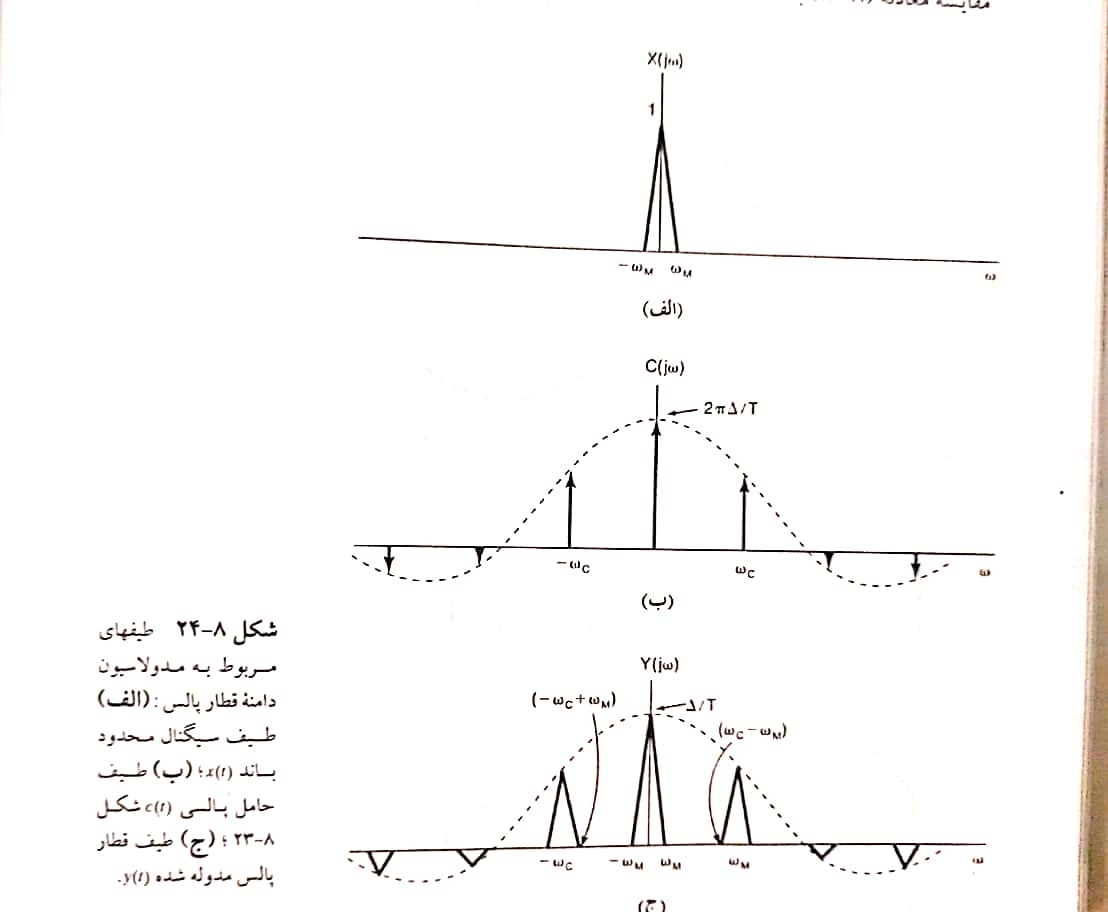


</div>

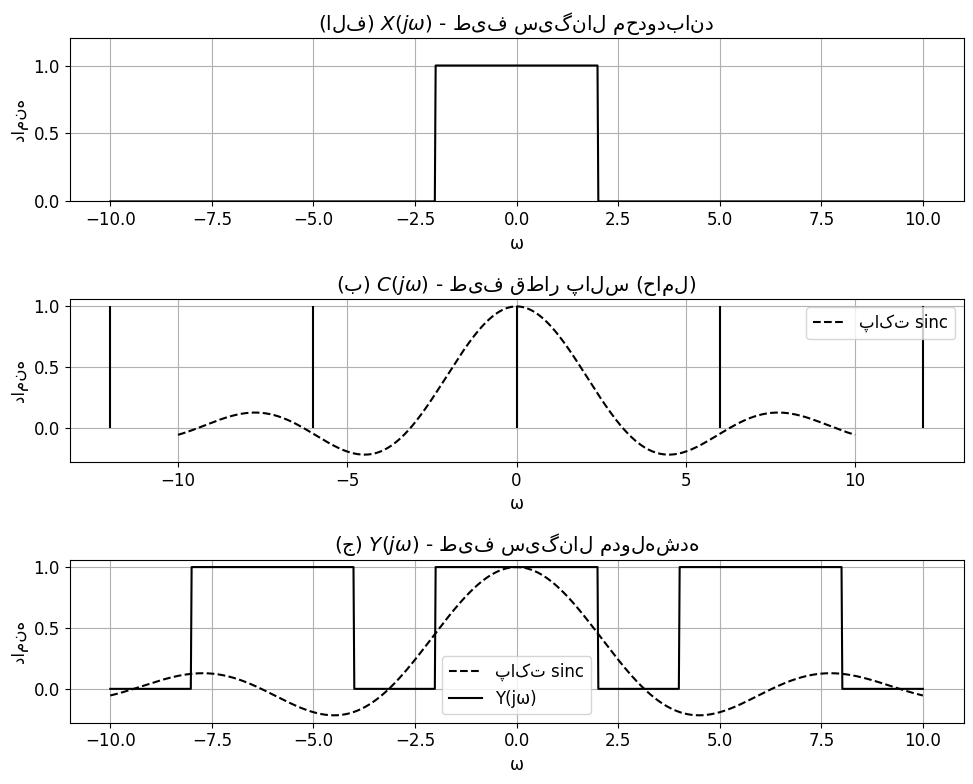

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# تنظیم اندازه نمودار
plt.figure(figsize=(10, 8))

# ======= (الف) =======
plt.subplot(3, 1, 1)
omega = np.linspace(-10, 10, 1000)
X = np.where(np.abs(omega) < 2, 1, 0)
plt.plot(omega, X, 'k')
plt.title("(الف) $X(j\\omega)$ - طیف سیگنال محدودباند")
plt.xlabel("ω")
plt.ylabel("دامنه")
plt.grid(True)
plt.ylim(0, 1.2)

# ======= (ب) =======
plt.subplot(3, 1, 2)
omega_c = 6
C = np.sinc(omega / np.pi)
plt.plot(omega, C, 'k--', label='پاکت sinc')
for k in range(-2, 3):
    plt.vlines(k * omega_c, 0, 1, colors='k', linestyles='solid')
plt.title("(ب) $C(j\\omega)$ - طیف قطار پالس (حامل)")
plt.xlabel("ω")
plt.ylabel("دامنه")
plt.grid(True)
plt.legend()

# ======= (ج) =======
plt.subplot(3, 1, 3)
Y = np.zeros_like(omega)
for k in range(-2, 3):
    shifted = np.where(np.abs(omega - k * omega_c) < 2, 1, 0)
    Y += shifted
plt.plot(omega, np.sinc(omega / np.pi), 'k--', label='پاکت sinc')
plt.plot(omega, Y, 'k', label='Y(jω)')
plt.title("(ج) $Y(j\\omega)$ - طیف سیگنال مدوله‌شده")
plt.xlabel("ω")
plt.ylabel("دامنه")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


<div dir="rtl" style="text-align: right; font-family: B Nazanin; font-size: 24px;">
شبیه طیف حاصل از نمونه برداری با قطار ضربه است , تنها تفاوت این دو درضرایب فوریه ی قطار پالس و قطار
 ضربه است. برای قطار ضربه ای که در فصل ۷ به کار بردیم تمام ضرائب فوریه برابر ۱٫۲ هستند، ولی برای قطار پالس  c(t) شکل 23.8 ضرایب سریه فوریه از معادله 8-25 به دست میانید به ازای WC>2WM تکرار های X(JW)
تکرارهای روی هم نمی افتند، و این همان شرط نایکوییست است. در صورت ارضای این شرط  درست مانند نمونه برداری با قطار ضربه ، (1) را میتوان به کمک فیلتر پایین گذر از (1) بازیابی کرد.   
توجه کنید برای بسیاری از شکل موجهای پالسی دیگر نیز همین نتایج صادق اند: اگر (1)) سیگنال  متناوب دلخواهی با تبدیل فوریه ای شبیه معادله (۸-۲۴) با ضرائب فوریه ) باشد (j) به صورت معادله  (۲۶-۸) است. پس اگر ۲۸ < T = ) ، تکرارهای (X (i روی هم نمی افتند و می توانیم (1) x را به کمک  فیلتر پایین گذر به دست آوریم به شرطی که ضریب فوریه de ، ، غیر صفر باشد. در مسئله ۸-۱۱ خواهیم  دید که اگر a صفر یا خیلی کوچک باشد میتوان با فیلتر میانگذر یکی از (Xjwهای جابجا شده متناظر با ax  بزرگ را برگزید و یک سیگنال AM سینوسی به دست آورد که ضریبی از (۱) د سیگنال مدوله کننده آن است.  برای بازیابی (1) x میتوان روشهای دمدولاسیون توصیف شده در بخش ۸-۲ را به کار برد


<div dir="rtl" style="text-align: right;">


# ۲-۵-۸ مالتی پلکس حوزه زمان

 مدولاسیون دامنه با حامل قطار پالس غالباً برای ارسال همزمان چند سیگنال بر روی یک کانال به کار  مدوله شده اند ارسال کرد شکل ۸-۲۵ دو نمایش هم ارز این فرایند را نشان می دهد. در این روش به هر  سیگنال در هر T ثانیه یک شکاف زمانی به اندازه ۵ اختصاص می یابد. هر چه نسبت A٫T کوچکتر باشد،   
تعداد سیگنال بیشتری را میتوان روی کانال ارسال کرد. این روش را مالتی پلکس زمانی (TDM) می نامند. در  مالتی پلکس فرکانسی بخش ۳۸ به هر سیگنال فاصله فرکانسی مختلفی اختصاص می یابد ولی در  مالتی پلکس زمانی هر سیگنال فواصل زمانی خاص خود را دار است برای دی مالتی پلکس سیگنال مرکب  شکل ۸-۲۴ از دروازه های زمانی استفاده میشود؛ در این کار سیگنال مرکب در زمانهای اختصاص یافته به   هر سیگنال به خط مربوط به آن سیگنال وصل می شود.
</div>



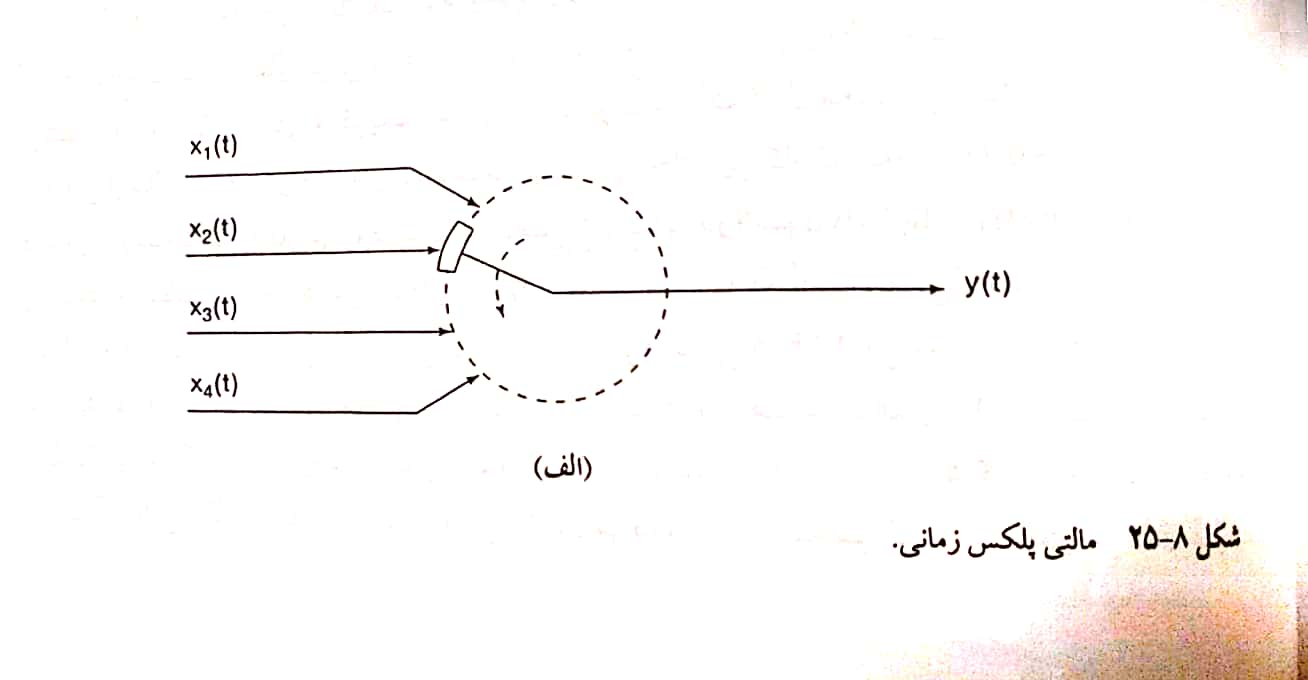

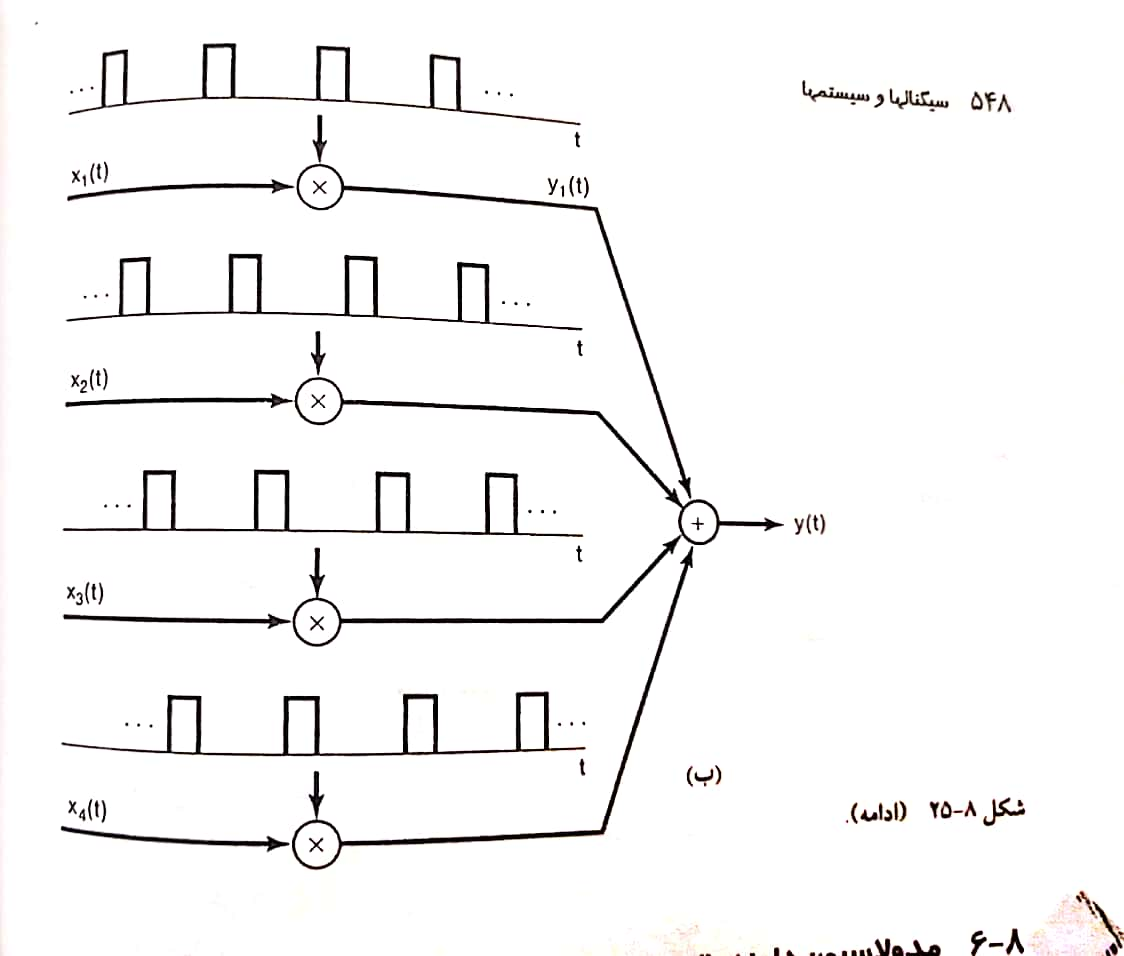

<div dir="rtl" style="text-align: right;font-size: 14px;">


# **۶-۸ مدولاسیون دامنه پالس   **


#  ***۱-۶-۸ سیگنال مدوله شده دامنه پالس  ***

در بخش ۵۸ یک سیستم مدولاسیون توصیف کردیم که در آن سیگنال پیوسته در زمان (1)x یک قطار پالس  متناوب را مدوله میکرد و معادل این بود که در هر ثانیه یک شکاف 4 ثانیه ای به (1) x اختصاص یابد. در آن  مباحث و در مبحث نمونه برداری فصل ۷ دیدیم که امکان بازیابی (1) از این شکافهای زمانی به اندازه  شکافهای ۵ بستگی ندارد، بلکه به فرکانس ۲٫۳ آنها بستگی دارد که باید از آهنگ نایکوییست بیشتر باشد  تا بتوان (4) بدون اختلاطی را بازیابی کرد. یعنی در واقع تنها ارسال نمونه های (x (T سیگنال (1) x لازم است.   
در واقع در سیستمهای نوین مخابراتی نمونه های سیگنال حاوی اطلاعات (1) x ارسال می شود نه  برشهای آن به دلائل عملی ماکزیمم دامنه ای که میتوان در یک کانال مخابراتی ارسال کرد محدودست  بنابراین ارسال نمونههای ضربه ای (1) عملی نیست به جای این کار نمونه های (T) برای مدوله کردن  دامنه یک رشته پالس به کار می رود سیستم حاصل را سیستم مدولاسیون دامنه پالس (PAM) می نامند. کاربرد  پالسهای مستطیلی با راهبرد نمونه بردار - نگهدار متناظر ست که در آن پالسهایی با عمر ۵ و دامنه ای که با  مقدار (1) در لحظه نمونه برداری برابرست تولید میشود. شکل ۸-۲۶ شکل موج یک کانال PAM را نشان  می دهد. در این شکل منحنی خط چین سیگنال (۲) را نشان میدهد. سیگنالهای PAM را نیز می توان مانند  سیگنالهای مدوله شده به روش بخش ۸-۵ مالتی پلکس زمانی کرد. این کار در شکل ۸-۲۷ تصویر شده  است. که مالتی پلکس زمانی سه شکل موج را نشان میدهد. برای مشخص کردن پالسهای هر کانال هم از



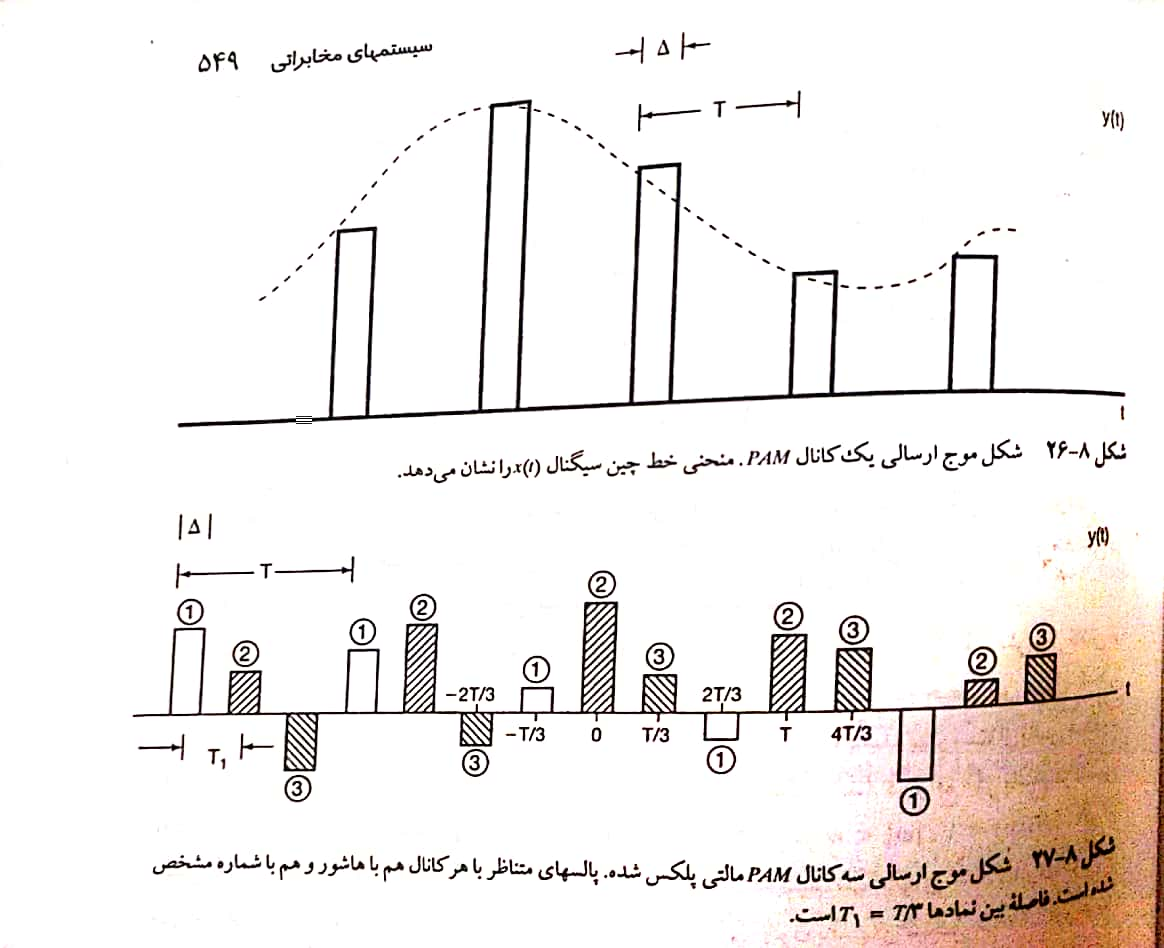

<div dir="rtl" style="text-align: right; font-family: B Nazanin; font-size: 14px;">

هاشور استفاده کرده ایم و هم از شماره به ازای یک زمان تناوب 7 ثابت ، هر چه عرض پالس کوچکتر باشد،  زیادتر کرد تا پالس ارسالی انرژی کافی داشته باشد.   
در طراحی سیگنالهای PAM علاوه بر انرژی ملاحضات دیگری نیز باید در مد نظر باشد. می دانیم که اگر  فرکانس نمونه برداری از آهنگ نایکوییست بیشتر باشد (1) را میتوان از روی نمونه هایش بازیابی کرد، و  بنابراین میتوان این نمونه ها را برای مدوله کردن دامنه یک رشته پالسی متناوب با شکل دلخواه به کار برد.  گزینش شکل پالس توسط مسائلی چون فرکانس گزینی محیط انتقال ، و تداخل بین نمادها که موضوع بخش  بعدی است، تعیین می شود..


<div dir="rtl" style="text-align: right; font-family: B Nazanin; font-size: 14px;">